<a href="https://colab.research.google.com/github/mathewchamberlain/MBA/blob/main/HW_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alternative HW assignment




## Setup

Lets start by importing the packages we'll need and mounting our Google Drive as before. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from google.colab import drive
from sklearn.preprocessing import PolynomialFeatures
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# import the data
df = pd.read_csv('/content/drive/MyDrive/housing22.csv', delimiter=',',index_col = 0)

In [3]:
# remove all instances where population is less than 2000 or total_rooms < 35000
df = df[(df['population'] < 20000) | (df['total_rooms'] < 35000)]
# replace missing values with the column median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [4]:
# split test and train using the first 5000 rows. Setup test + train.
n = df.shape[0] - 5000
df_train = df.head(5000)
df_test = df.tail(n)
y_train = df_train['median_house_value']
y_test = df_test['median_house_value']
df_train = df_train.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)
print(df_train.shape, df_test.shape)

(5000, 11) (3002, 11)


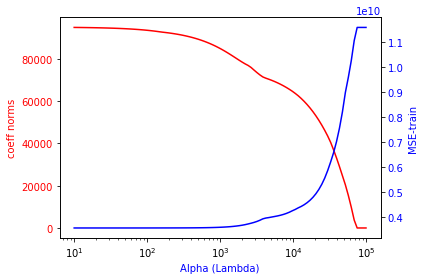

In [5]:
# make 100 values of lambda
lambda_vals = np.logspace(1,5,100)
norms = []
mses = []
mses_test = []
coefs = []

# generate LASSO model with standardization
for a in lambda_vals: 
  model = make_pipeline(StandardScaler(with_mean=False),
                      Lasso(alpha=a, max_iter=10000))
  model.fit(df_train, y_train)
  norms.append(np.linalg.norm(model['lasso'].coef_)) # store model coef
  mses.append(mean_squared_error(model.predict(df_train),y_train)) # store MSE
  mses_test.append(mean_squared_error(model.predict(df_test),y_test)) # store MSE
  coefs.append(model['lasso'].coef_)  # sparse matrix)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Alpha (Lambda)', color='b')
ax1.set_ylabel('coeff norms', color='r')
ax1.set_xscale('log')
ax1.plot(lambda_vals, np.array(norms), color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

ax2.set_ylabel('MSE-train', color='b')  #  already handled the x-label 
ax2.plot(lambda_vals, np.array(mses), color='b')
ax2.tick_params(axis='y', labelcolor='b')

fig.tight_layout() 
plt.show()

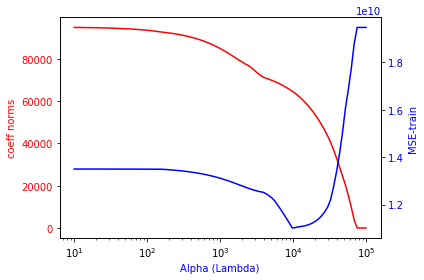

In [15]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Alpha (Lambda)', color='b')
ax1.set_ylabel('coeff norms', color='r')
ax1.set_xscale('log')
ax1.plot(lambda_vals, np.array(norms), color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

ax2.set_ylabel('MSE-train', color='b')  #  already handled the x-label 
ax2.plot(lambda_vals, np.array(mses_test), color='b')
ax2.tick_params(axis='y', labelcolor='b')
fig.tight_layout() 
plt.show()

*We* can refresh our memories of what goes on in the dataset by looking at the column names. 

In [12]:
dc = pd.DataFrame(coefs, columns = df_train.columns)
dc['lambda'] = lambda_vals

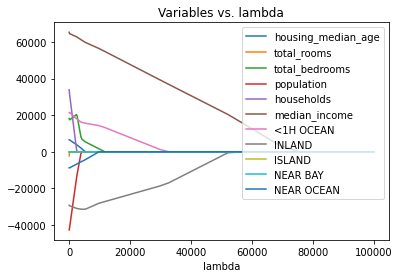

In [13]:
import matplotlib.pyplot as plt
company_list = dc.columns.drop('lambda')
dc.plot(x='lambda', y = company_list, title=f'Variables vs. lambda')
plt.show()